In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import sympy 
from sympy import banded, ones, Matrix, symbols, sqrt, print_latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [31]:
Nv = 4

In [41]:
xi, a, b, c = symbols('xi a b c') 
k = symbols('k', integer = True)

In [42]:
vec = sympy.zeros(Nv)
for jj in range(1, Nv+1):
    vec[jj-1] = sympy.sqrt(jj)/ (sympy.sqrt(2))

In [43]:
vec[0, :]

Matrix([[sqrt(2)/2, 1, sqrt(6)/2, sqrt(2)]])

In [44]:
A = banded({1: tuple(vec[0, :-1]), -1: tuple(vec[0, :-1])})

In [45]:
#A[-1, 0] += a*sympy.sqrt(Nv)/ sympy.sqrt(2)
#A[-1, 1] += b*sympy.sqrt(Nv)/ sympy.sqrt(2)
A[-1, Nv-1] += sympy.I * k / np.abs(k) * c *sympy.sqrt(Nv)/ sympy.sqrt(2)
#A[-1, 3] += d*sympy.sqrt(Nv)/ sympy.sqrt(2)

In [46]:
A

Matrix([
[        0, sqrt(2)/2,         0,                    0],
[sqrt(2)/2,         0,         1,                    0],
[        0,         1,         0,            sqrt(6)/2],
[        0,         0, sqrt(6)/2, sqrt(2)*I*c*k/Abs(k)]])

In [47]:
I = np.eye(Nv, dtype=int)

In [48]:
M = sympy.Matrix(I*xi - k/np.abs(k)*A)

In [49]:
R_approx = sympy.simplify(sympy.simplify(M.inv()[0, 1]/sympy.sqrt(2) * k/np.abs(k)))

In [50]:
R_approx

(2*sqrt(2)*c*xi + 2*I*xi**2 - 3*I)/(4*sqrt(2)*c*xi**3 - 6*sqrt(2)*c*xi + 4*I*xi**4 - 12*I*xi**2 + 3*I)

In [51]:
print_latex(R_approx)

\frac{2 \sqrt{2} c \xi + 2 i \xi^{2} - 3 i}{4 \sqrt{2} c \xi^{3} - 6 \sqrt{2} c \xi + 4 i \xi^{4} - 12 i \xi^{2} + 3 i}


# Taylor Series Approximation

In [52]:

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(xi, i).subs(xi, x0))/(factorial(i))*(xi -x0)**i
        i += 1
    return p

In [53]:
asymptotics = sympy.simplify(taylor(function=R_approx, x0=0, n=2))
asymptotics

4*sqrt(2)*I*c*xi/3 + 2*xi**2*(8*c**2 - 5)/3 - 1

In [18]:
sympy.expand(sympy.simplify(asymptotics))

-2*xi**2 - 1 + 2*sqrt(6)*I*xi/(3*c) + 4*xi**2/c**2

In [32]:
print_latex(asymptotics)

- 2 \xi^{2} - 1 + \frac{\sqrt{6} i \xi}{3 c} + \frac{\xi^{2}}{c^{2}}


# Kinetic response function 

In [59]:
def Z_fun(z):
    return 1j*np.sqrt(np.pi)*wofz(z)

def R(zeta):
    return -(1 + zeta*Z_fun(zeta))

def R_HP3_hermite(zeta):
    c = -np.sqrt(2)*2/np.sqrt(3*np.pi)
    return (np.sqrt(6)*c + 1j*zeta)/(2*np.sqrt(6)*c*(zeta**2) - np.sqrt(6)*c + 2j*(zeta**3) - 3j*zeta)

def R_HP4_hermite(zeta):
    c = -3*np.sqrt(np.pi)/(4*np.sqrt(2))
    return (2*np.sqrt(2)*c*zeta + 2j*(zeta**2) - 3j)/(4*np.sqrt(2)*c*(zeta**3) - 6*np.sqrt(2)*c*zeta + 4j*(zeta**4) - 12j*(zeta**2) + 3j)

def RHP3(xi):
    return -(-1j*xi + (2/np.sqrt(np.pi)))/((2/(np.sqrt(np.pi))) - 3j*xi - 4/(np.sqrt(np.pi)) * (xi**2) + 2j*(xi**3))

def RHP4(xi):
    return (-4 + 2j*np.sqrt(np.pi)*xi + (3*np.pi -8)*(xi**2))/(4 - 6j*np.sqrt(np.pi)*xi - (9*np.pi - 16)*(xi**2) + 4j*np.sqrt(np.pi)*(xi**3) + 2*(3*np.pi - 8)*(xi**4))

In [60]:
zeta = 10**np.linspace(-2, 3, 200)

In [61]:
R_HP3_like = R_HP3_hermite(zeta)
R_HP4_like = R_HP4_hermite(zeta)
R_true = R(zeta)

In [62]:
R_HP3 = RHP3(zeta)
R_HP4 = RHP4(zeta)

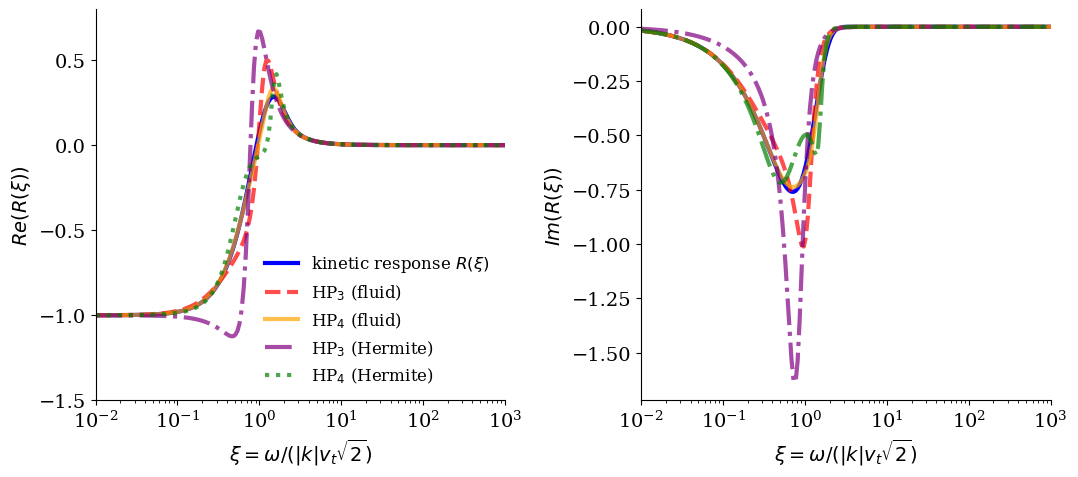

In [77]:
fig, ax = plt.subplots(ncols=2, figsize=(11, 5))

ax[0].plot(zeta, np.real(R_true), label=r"kinetic response $R(\xi)$", c="blue", linewidth=3)

ax[0].plot(zeta, np.real(R_HP3), "--", label=r"HP$_{3}$ (fluid)", c="red", linewidth=3, alpha=0.7)
ax[0].plot(zeta, np.real(R_HP4), "-", label=r"HP$_{4}$ (fluid)", c="orange", linewidth=3, alpha=0.7)
ax[0].plot(zeta, np.real(R_HP3_like), label=r"HP$_{3}$ (Hermite)", c="purple", ls="-.", linewidth=3, alpha=0.7)
ax[0].plot(zeta, np.real(R_HP4_like), label=r"HP$_{4}$ (Hermite)", c="green", ls=":", linewidth=3, alpha=0.7)

ax[1].plot(zeta, np.imag(R_true), c="blue", linewidth=3)
ax[1].plot(zeta, np.imag(R_HP3), "--", c="red", linewidth=3, alpha=0.7)
ax[1].plot(zeta, np.imag(R_HP4), "-",  c="orange", linewidth=3, alpha=0.7)
ax[1].plot(zeta, np.imag(R_HP3_like), ls="-.", c="purple", linewidth=3, alpha=0.7)
ax[1].plot(zeta, np.imag(R_HP4_like), ls="-.", c="green", linewidth=3, alpha=0.7)

ax[0].set_ylim(-1.5, 0.8)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].set_ylabel(r"$Re(R(\xi))$")
ax[1].set_ylabel(r"$Im(R(\xi))$")
ax[0].set_xlabel(r"$\xi = \omega/(|k|v_{t} \sqrt{2})$")
ax[1].set_xlabel(r"$\xi = \omega/(|k|v_{t} \sqrt{2})$")
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlim(1e-2, 1e3)
ax[1].set_xlim(1e-2, 1e3)
legend = ax[0].legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figs/symbolic_response_function_SPS_HPlike.png", dpi=600)

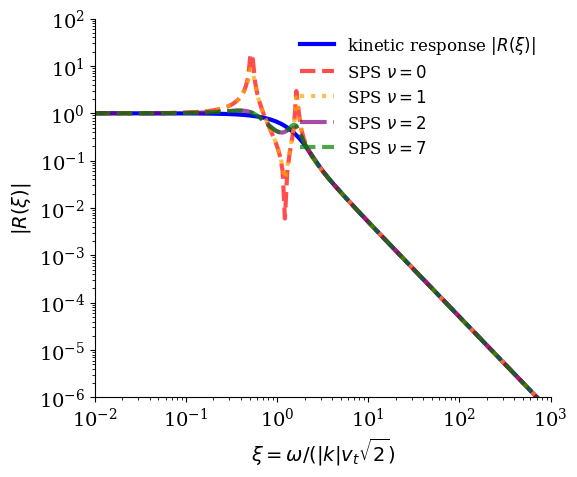

In [30]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(zeta, np.abs(R_true), label=r"kinetic response $|R(\xi)|$", c="blue", linewidth=3)
ax.plot(zeta, np.abs(R_0), label=r"SPS $\nu=0$", c="red", ls="--", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(R_1), label=r"SPS $\nu=1$", c="orange", ls=":", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(R_2), label=r"SPS $\nu=2$", c="purple", ls="-.", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(R_7), label=r"SPS $\nu=7$", c="green", ls="--", linewidth=3, alpha=0.7)
ax.set_ylim(10**-6, 10**2)
ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|R(\xi)|$")
ax.set_xlabel(r"$\xi = \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e3)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figs/symbolic_response_function_SPS_collisons.png", dpi=600)

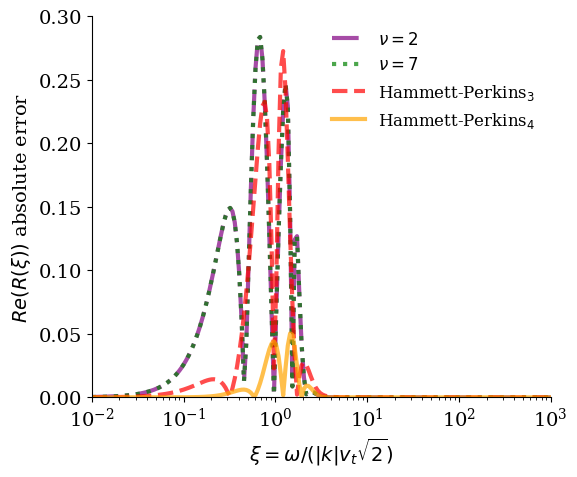

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(zeta, np.abs(np.real(R_2)-np.real(R_true)), label=r"$\nu=2$", c="purple", ls="-.", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(np.real(R_true)-np.real(R_7)), ":", label=r"$\nu=7$", c="green", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(np.real(R_true)-np.real(R_HP3)), "--", label=r"Hammett-Perkins$_{3}$", c="red", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(np.real(R_true)-np.real(R_HP4)), "-", label=r"Hammett-Perkins$_{4}$", c="orange", linewidth=3, alpha=0.7)

ax.set_ylim(0, 0.3)
#ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$Re(R(\xi))$ absolute error")
ax.set_xlabel(r"$\xi = \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e3)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figs/symbolic_response_function_AW_collisons_real_" + str(Nv) + ".png", dpi=600)

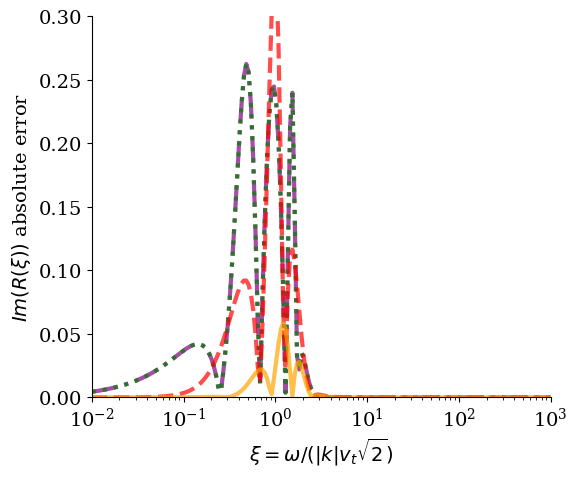

In [32]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(zeta, np.abs(np.imag(R_2)-np.imag(R_true)), label=r"$\nu=2$", c="purple", ls="-.", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(np.imag(R_true)-np.imag(R_7)), ":", label=r"$SPS_{} Re(R(\xi))$", c="green", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(np.imag(R_true)-np.imag(R_HP3)), "--", label=r"Hammett-Perkins$_{3}$", c="red", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(np.imag(R_true)-np.imag(R_HP4)), "-", label=r"Hammett-Perkins$_{4}$", c="orange", linewidth=3, alpha=0.7)

ax.set_ylim(0, 0.3)
#ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$Im(R(\xi))$ absolute error")
ax.set_xlabel(r"$\xi = \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e3)
#legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower right')
#legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figs/symbolic_response_function_AW_collisons_imag_" + str(Nv) + ".png", dpi=600)

# Landau Damping Dispersion Relation

In [148]:
def disp_k(omega, k=1):
    return k**2 - R(zeta=omega/(np.sqrt(2)*k))

def disp_hp3(omega, k=1, nu=1):
    return k**2 - RHP3(xi=omega/(k*np.sqrt(2)))

def disp_hp4(omega, k=1, nu=1):
    return k**2 - RHP4(xi=omega/(k*np.sqrt(2)))

def disp_R6(omega, k=1, nu=1):
    return k**2 -  R6(zeta=omega/(k*np.sqrt(2)), col=nu)

In [149]:
res_true = scipy.optimize.newton(disp_k, 1.41-0.81j, maxiter=100)

In [150]:
res_hp3 = scipy.optimize.newton(disp_hp3, 2-0.61j, maxiter=100)

In [151]:
res_hp4 = scipy.optimize.newton(disp_hp4, 2-0.61j, maxiter=100)

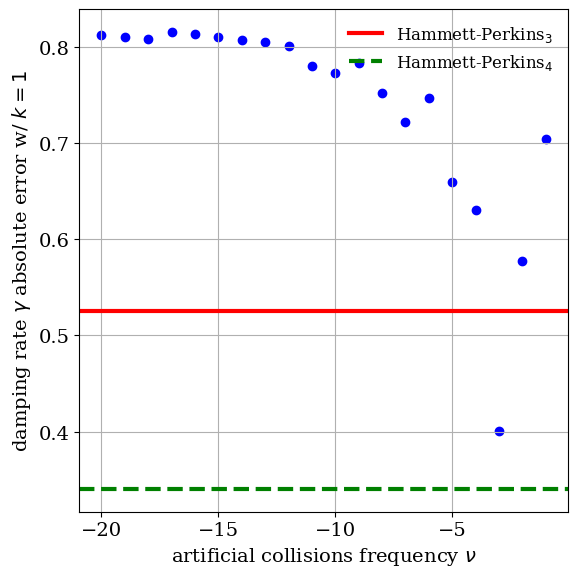

In [152]:
fig, ax = plt.subplots(figsize=(6, 6))
for nu_ in range(-20, 0):
    omega_r = np.linspace(0, 3, int(1e3))
    omega_i = np.linspace(-1, 0, int(1e3))
    X, Y = np.meshgrid(omega_r, omega_i)
    Z = disp_R6(X+1j*Y, nu=nu_)
    index = np.unravel_index(np.nanargmin(np.abs(Z)), Z.shape)
    if np.nanmin(np.abs(Z)) < 1E-2:
        ax.scatter(nu_, np.abs(Y[index].real-res_true.imag), c="blue")

ax.axhline(np.abs(res_hp3.imag-res_true.imag), label="Hammett-Perkins$_{3}$", c="red", linewidth=3)
ax.axhline(np.abs(res_hp4.imag-res_true.imag), label="Hammett-Perkins$_{4}$", c="green", ls="--", linewidth=3)
ax.set_xlabel(r"artificial collisions frequency $\nu$")
ax.set_ylabel(r"damping rate $\gamma$ absolute error w/ $k=1$")

legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.grid()

plt.tight_layout()